## SURBHI THAKUR 


### Problem Statement: Predict the percentage of an student based on the no. of study hours.What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
#reading data 
data=pd.read_csv('task.csv')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


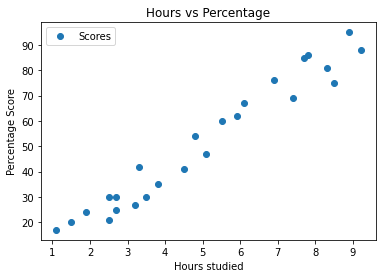

In [7]:
#plotting the graph
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()


## we can clearly see that there is a  positive linear relation between percentage and hours studied

In [8]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
linearRegressor=LinearRegression()
linearRegressor.fit(X_train,y_train)
y_predict=linearRegressor.predict(X_test)



In [21]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
print('training complete')

training complete


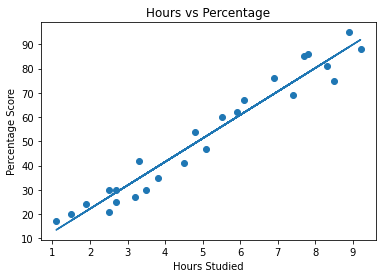

In [22]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

In [23]:
print('Test Score')
print(regressor.score(X_test, y_test))
print('Training Score')
print(regressor.score(X_train, y_train))

Test Score
0.9678055545167994
Training Score
0.9491209376364416


In [24]:
y_test

array([81, 30, 21, 76, 62], dtype=int64)

In [25]:
y_predict

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [26]:
#Let's predict the score for 9.25 hpurs
print('Score of student who studied for 9.25 hours a dat', regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a dat [92.38611528]


In [27]:
#Checking the efficiency of model

mean_squ_error = mean_squared_error(y_test, y_predict[:5])
mean_abs_error = mean_absolute_error(y_test, y_predict[:5])
print("Mean Squred Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)

Mean Squred Error: 18.943211722315272
Mean absolute Error: 3.9207511902099244


### comparing actual vs predicted

In [28]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})  
print(df)

   Actual  Predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153


<AxesSubplot:>

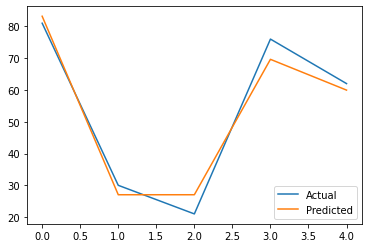

In [29]:
df.plot(kind='line')